In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\klsis\anaconda3\envs\penn_flask\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("Data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 
                        'koi_period','koi_period_err1', 'koi_period_err2', 
                        'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2',
                        'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
                        'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 
                        'koi_depth', 'koi_depth_err1','koi_depth_err2', 
                        'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 
                        'koi_insol','koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 
                        'koi_steff', 'koi_steff_err1','koi_steff_err2', 
                        'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 
                        'koi_srad', 'koi_srad_err1', 'koi_srad_err2','ra', 'dec', 'koi_kepmag']]
selected_features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split
Use koi_disposition for the y values

In [6]:
y = df["koi_disposition"]
X = selected_features

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [8]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,2.213000e-04,-2.213000e-04,132.035800,0.014300,-0.014300,...,-286,3.805,0.390,-0.130,2.730,0.535,-1.248,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,1.528000e-04,-1.528000e-04,131.968430,0.008230,-0.008230,...,-72,4.083,0.368,-0.092,1.453,0.218,-0.510,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,6.930000e-07,-6.930000e-07,137.137607,0.000053,-0.000053,...,-159,4.462,0.098,-0.182,0.897,0.238,-0.119,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,1.194000e-02,-1.194000e-02,136.373100,0.019000,-0.019000,...,-146,4.456,0.102,-0.361,0.867,0.448,-0.103,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,1.250000e-06,-1.250000e-06,133.850441,0.000978,-0.000978,...,-167,3.975,0.259,-0.111,1.851,0.383,-0.575,288.90253,44.632992,12.953


# Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model

k: 1, Train/Test Score: 1.000/0.830
k: 3, Train/Test Score: 0.908/0.855
k: 5, Train/Test Score: 0.886/0.855
k: 7, Train/Test Score: 0.875/0.855
k: 9, Train/Test Score: 0.868/0.855
k: 11, Train/Test Score: 0.863/0.853
k: 13, Train/Test Score: 0.859/0.852
k: 15, Train/Test Score: 0.858/0.852
k: 17, Train/Test Score: 0.856/0.850
k: 19, Train/Test Score: 0.851/0.847


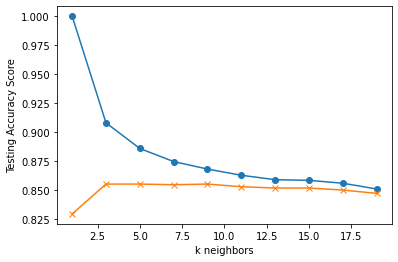

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot with elbow method    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [12]:
# Note that k:9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)

print(f"k = 9: Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"k = 9: Testing Data Score: {knn.score(X_test_scaled, y_test)}")

k = 9: Training Data Score: 0.8682052260156399
k = 9: Testing Data Score: 0.8552631578947368


In [13]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE']))

                precision    recall  f1-score   support

     CONFIRMED       0.74      0.65      0.69       422
FALSE POSITIVE       0.72      0.80      0.76       450
     CANDIDATE       0.98      0.98      0.98       876

      accuracy                           0.86      1748
     macro avg       0.81      0.81      0.81      1748
  weighted avg       0.86      0.86      0.85      1748



# Save the Model

In [14]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']